# Assignment Dates:
# - March 21 - Flask
# - April 4 - Qlik
# - April 18 - Tableau
# - May 2nd - Power BI & Final Project

In [1]:
# import plotly.io as pio
# pio.renderers.default = "iframe"

import matplotlib.pyplot as plt
import branca.colormap as cm
import contextily as ctx
import geopandas as gpd
import pandas as pd
import numpy as np
import folium

/Users/heatherbaier/opt/anaconda3/envs/caoep/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [12]:
# !pip show contextily

<AxesSubplot:>

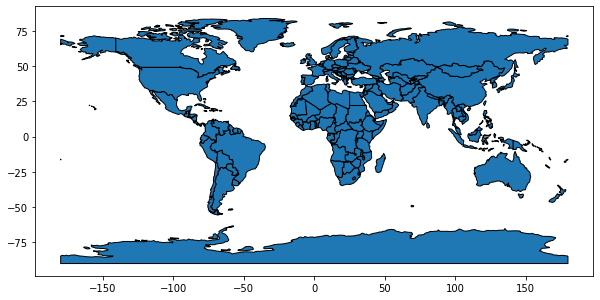

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10, 6), edgecolor="black")

In [9]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
# !pip install geopandas==0.14.4

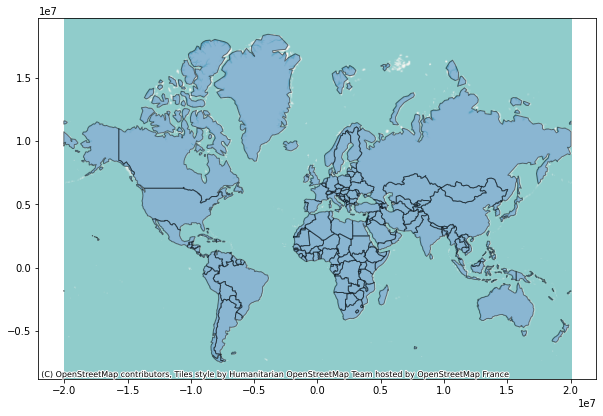

In [11]:
world_wm = world.to_crs(epsg=3857)
world_wm = world_wm[world_wm["continent"] != "Antarctica"]

ax = world_wm.plot(figsize=(10, 10), alpha = 0.5, edgecolor="k")
ctx.add_basemap(ax)

In [13]:
df = "./data/for_planet.csv"
df = pd.read_csv(df).sample(1000)
df.head()

,school_name,school_id,all_subjects,latitude,longitude
0,Abelardo G. Tinio ES,107022,105.30,15.143412,120.618172
1,Angeles ES,107023,137.05,15.134346,120.595711
2,Belen Homesite ES,107024,142.39,15.140863,120.600142
3,Cutud ES,107025,166.03,15.171331,120.627026
4,Don Ambrosio Mendiola ES,107026,152.81,15.141667,120.626944


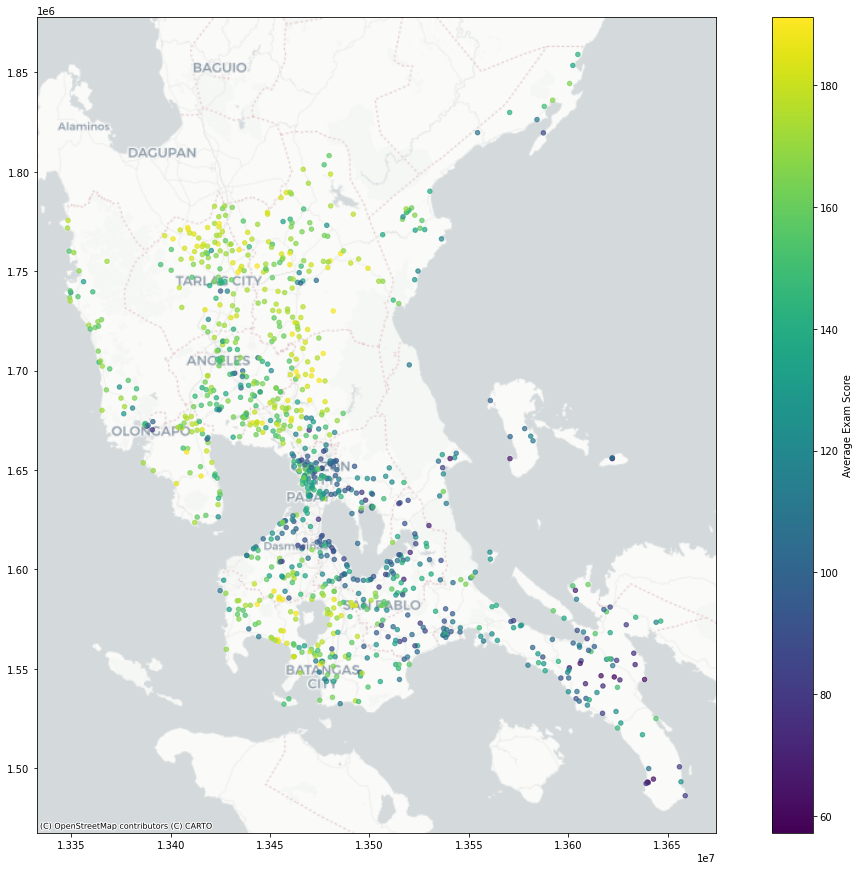

In [30]:
df = "./data/for_planet.csv"
df = pd.read_csv(df).sample(1000)
df.head()

df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))
df.set_crs(epsg=4326, inplace = True)
df.to_crs(epsg=3857, inplace = True)

fig, ax = plt.subplots(figsize=(20, 15))
df.plot(ax=ax, alpha=0.7, markersize = 20, label="Schools", column = df["all_subjects"], \
        legend=True, legend_kwds={"label": "Average Exam Score", "orientation": "vertical"})
ctx.add_basemap(ax, source = ctx.providers.CartoDB.Positron)
plt.show()

In [31]:
crime = gpd.read_file("./data/shp/central_america_crime.shp")
crime

,event_id_c,event_date,year,time_preci,disorder_t,event_type,sub_event_,actor1,assoc_acto,inter1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,tags,timestamp,geometry
0,GTM8861,24 January 2025,2025,1,Political violence,Violence against civilians,Attack,Unidentified Gang (Guatemala),None,Political militia,...,14.6225,-90.5184,1,Prensa Libre (Guatemala),National,"On 24 January 2025, in Guatemala City, Guatema...",0,None,1738026271,POINT (-90.51840 14.62250)
1,HND10433,24 January 2025,2025,2,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Honduras),None,Political militia,...,14.9448,-88.7421,2,El Heraldo (Honduras),National,"Around 24 January 2025 (as reported), near Tri...",0,local administrators,1738026272,POINT (-88.74210 14.94480)
2,HND10447,24 January 2025,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Honduras),Miskito Indigenous Group (Honduras),Protesters,...,15.0260,-84.2825,1,Proceso Digital,National,"On 24 January 2025, in Mocoron, Gracias a Dios...",0,crowd size=no report,1738026272,POINT (-84.28250 15.02600)
3,HND10451,24 January 2025,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Honduras),Teachers (Honduras),Protesters,...,13.5361,-87.4875,1,HCH,National,"On 24 January 2025, in Nacaome, Valle, teacher...",0,crowd size=no report,1738026272,POINT (-87.48750 13.53610)
4,HND10453,24 January 2025,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Honduras),Women (Honduras),Protesters,...,15.5042,-88.0250,1,Proceso Digital,National,"On 24 January 2025, in San Pedro Sula, Cortes,...",0,crowd size=no report,1738026272,POINT (-88.02500 15.50420)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32327,GTM1903,01 January 2018,2018,1,Political violence,Battles,Armed clash,Unidentified Gang (Guatemala),None,Political militia,...,14.6225,-90.5184,1,Dialogos - Observatorio sobre la Violencia,Local partner-National,"On 1 January 2018, in Guatemala City, Guatemal...",1,None,1618530722,POINT (-90.51840 14.62250)
32328,CRI817,01 January 2018,2018,1,Demonstrations,Protests,Peaceful protest,Protesters (Costa Rica),Taxi/Bus Drivers (Costa Rica),Protesters,...,9.9356,-84.0986,1,Diario Extra,National,"On 1 January 2018, in San Jose (San Jose), Ube...",0,crowd size=no report,1659979003,POINT (-84.09860 9.93560)
32329,BLZ175,01 January 2018,2018,1,Political violence,Battles,Armed clash,Majestic Alley Gang,None,Political militia,...,17.4995,-88.1976,1,Breaking Belize News; Channel 5 Belize; Guardi...,National,"On 1 January 2018, in Belize City, Belize, aro...",1,None,1682435730,POINT (-88.19760 17.49950)
32330,BLZ453,01 January 2018,2018,1,Political violence,Violence against civilians,Attack,Unidentified Gang (Belize),None,Political militia,...,17.5672,-88.4066,1,Breaking Belize News; Channel 5 Belize,National,"On 1 January 2018, in Burrell Boom, Belize, tw...",0,None,1682435730,POINT (-88.40660 17.56720)


<AxesSubplot:>

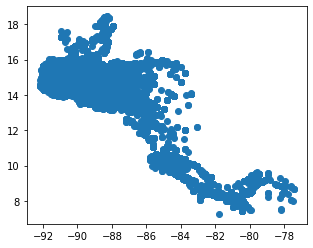

In [32]:
crime.plot()

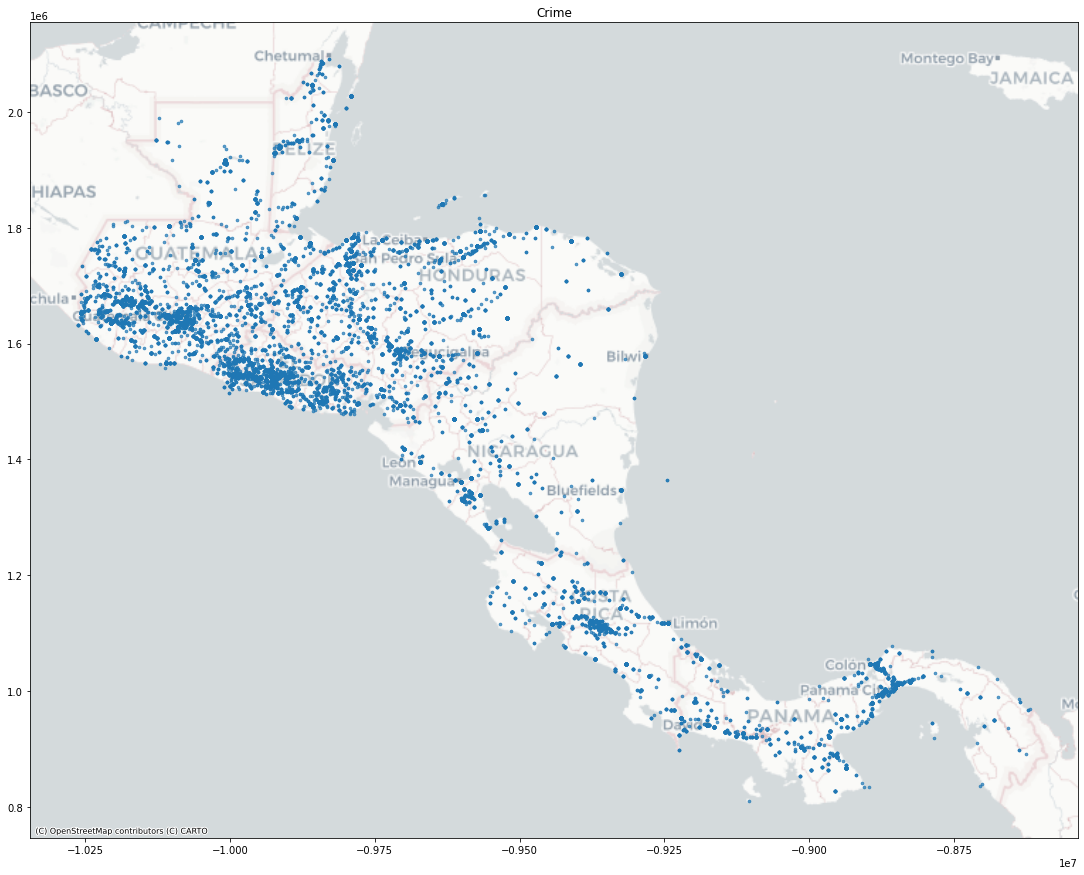

In [33]:
# Set CRS and reproject for basemap compatibility
crime.set_crs(epsg=4326, inplace=True)
crime = crime.to_crs(epsg=3857)

# Plot world map and overlay earthquakes
fig, ax = plt.subplots(figsize=(20, 15))

# Plot earthquakes (size based on magnitude)
crime.plot(ax=ax, alpha=0.7, markersize = 7)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.title("Crime")
plt.show()

Text(0, 0.5, 'Latitude')

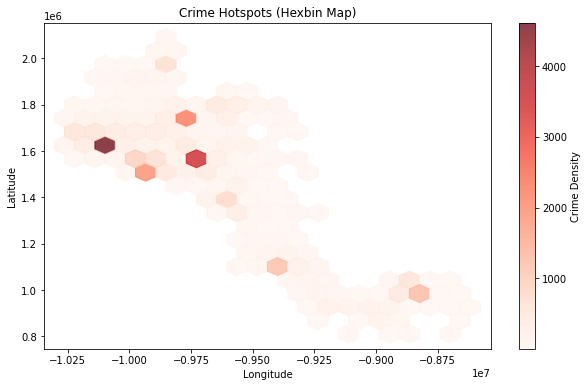

In [34]:
# Extract coordinates
x = crime.geometry.x
y = crime.geometry.y

# Create hexbin plot
fig, ax = plt.subplots(figsize=(10, 6))
hb = ax.hexbin(x, y, gridsize=20, cmap='Reds', alpha=0.75, mincnt=1)  # Adjust gridsize for resolution
plt.colorbar(hb, label="Crime Density")
ax.set_title("Crime Hotspots (Hexbin Map)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

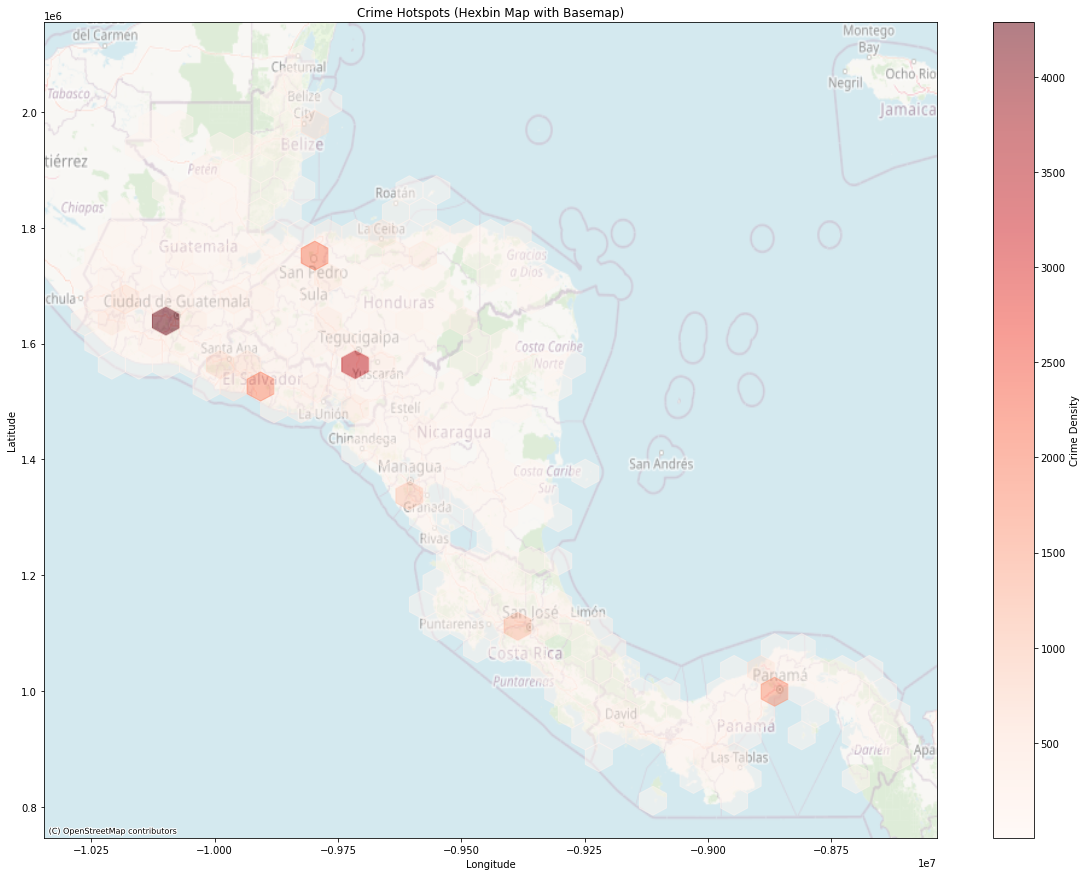

In [35]:


# Load point dataset
# gdf = gpd.read_file("your_file.geojson")

# Convert to Web Mercator (EPSG:3857) for basemap compatibility
crime = crime.to_crs(epsg=3857)

# Extract projected coordinates
x = crime.geometry.x
y = crime.geometry.y

# Create figure and plot hexbin
fig, ax = plt.subplots(figsize=(20, 15))
hb = ax.hexbin(x, y, gridsize=30, cmap='Reds', alpha=0.5, mincnt=1)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

# Customize plot
plt.colorbar(hb, label="Crime Density")
ax.set_title("Crime Hotspots (Hexbin Map with Basemap)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


In [36]:


# Load point dataset
# gdf = gpd.read_file("your_file.geojson")  # Ensure it has geometry



crimes = crime.sample(500).to_crs("epsg:4326")

# Get center of points for map focus
map_center = [crimes.geometry.y.mean(), crimes.geometry.x.mean()]

# Create Folium map
m = folium.Map(location=map_center, zoom_start=6)

# Add points to the map
for _, row in crimes.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
    ).add_to(m)

# Save or display
# m.save("crime_map.html")  # Opens in a browser
m
